# Graph Analysis
### Label propagation algorithm for community detection
**label propagation** is a **community detection** algorithm in which nodes adopt labels of their neighbors. Label propagation is **unsupervised** (no need to specify the number of communities), and works well on **large-scale** networks. 
<br>Imagine every node starts with a unique label (e.g., its own ID). Then, repeatedly: 
- Each node updates its label to match the majority label of its neighbors. 

Over time, densely connected groups "agree" on a common label — forming a community. 
     
<hr>

**Reminder:** **Community detection** is a fundamental task in network science and graph analysis that aims to identify **groups** (or **communities**) of **nodes** in a network that are more **densely** connected **internally** than with the rest of the network.


<hr>

In the following, we implement **label propagation** from scratch and test it first by a simple graph and then by the well-known **Zachary's Karate Club** network. We display the graphs and their communities with the help of **NetworkX**.
- For the Karate club, sometimes we may get three communities instead of two. This is normal because some nodes are **ambiguous**, and there is randomness in the algorithm. Even with the simple graph here, we might occasionally get one community.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import random
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def label_propagation_adjacency(adj_list, max_iterations=100):
    """
    Label Propagation Algorithm using Adjacency List
    
    Args:
        adj_list: dict {node: [neighbor1, neighbor2, ...]}
        max_iterations: maximum iterations to prevent infinite loops
    
    Returns:
        communities: dictionary {community_id: [node1, node2, ...]}
    """
    
    # Step 1: Initialize - each node gets its own label
    labels = {node: node for node in adj_list.keys()}
    
    # Track convergence
    changed = True
    iterations = 0
    
    # Step 2: Propagation loop
    while changed and iterations < max_iterations:
        changed = False
        iterations += 1
        
        # Step 3: Random node order
        nodes = list(adj_list.keys())
        random.shuffle(nodes)
        
        # Step 4: Update labels for each node
        for node in nodes:
            neighbors = adj_list.get(node, [])
            if not neighbors:  # Skip isolated nodes
                continue
                
            # Get neighbors' labels
            neighbor_labels = [labels[neighbor] for neighbor in neighbors]
            
            # Count frequency of each label
            label_counts = Counter(neighbor_labels)
            max_count = max(label_counts.values())
            
            # Find all labels with maximum frequency
            most_common_labels = [label for label, count in label_counts.items() 
                                if count == max_count]
            
            # Choose randomly if there's a tie
            new_label = random.choice(most_common_labels)
            
            # Step 5: Check if label changed
            if new_label != labels[node]:
                labels[node] = new_label
                changed = True
    
    print(f"Converged after {iterations} iterations")
    
    # Step 6: Group nodes by final labels
    communities = defaultdict(list)
    for node, label in labels.items():
        communities[label].append(node)
    
    return dict(communities)

In [3]:
# Helper functions to draw the graphs and communities 
def networkx_to_adjacency(nx_graph):
    """
    Convert NetworkX graph to adjacency list
    """
    adj_list = {}
    for node in nx_graph.nodes():
        adj_list[node] = list(nx_graph.neighbors(node))
    return adj_list

#--------------------

def adjacency_to_networkx(adj_list):
    """
    Convert adjacency list to NetworkX graph for visualization
    """
    G = nx.Graph()
    for node, neighbors in adj_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    return G

def visualize_communities_adjacency(adj_list, communities, title="Label Propagation Communities",pos=None):
    """Visualize graph with community coloring from adjacency list"""
    # Convert to NetworkX for visualization
    G = adjacency_to_networkx(adj_list)
    
    plt.figure(figsize=(12, 8))
    
    # Create position layout
    if pos is None:
        pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Color nodes by community
    colors = plt.cm.Set3(np.linspace(0, 1, len(communities)))
    
    for i, (comm_id, nodes) in enumerate(communities.items()):
        nx.draw_networkx_nodes(G, pos, nodelist=nodes,
                              node_color=[colors[i]],
                              node_size=1000, alpha=0.9)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=16)  
    
    plt.title(f"{title}\n{len(communities)} communities")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    return pos

Manual Example - Adjacency List:
  0: [1, 2]
  1: [0, 2]
  2: [0, 1, 6]
  3: [4, 5, 6]
  4: [3, 5]
  5: [3, 4]
  6: [2, 3]
Converged after 4 iterations

Detected 2 communities:
  Community 1: [0, 1, 2]
  Community 2: [3, 4, 5, 6]


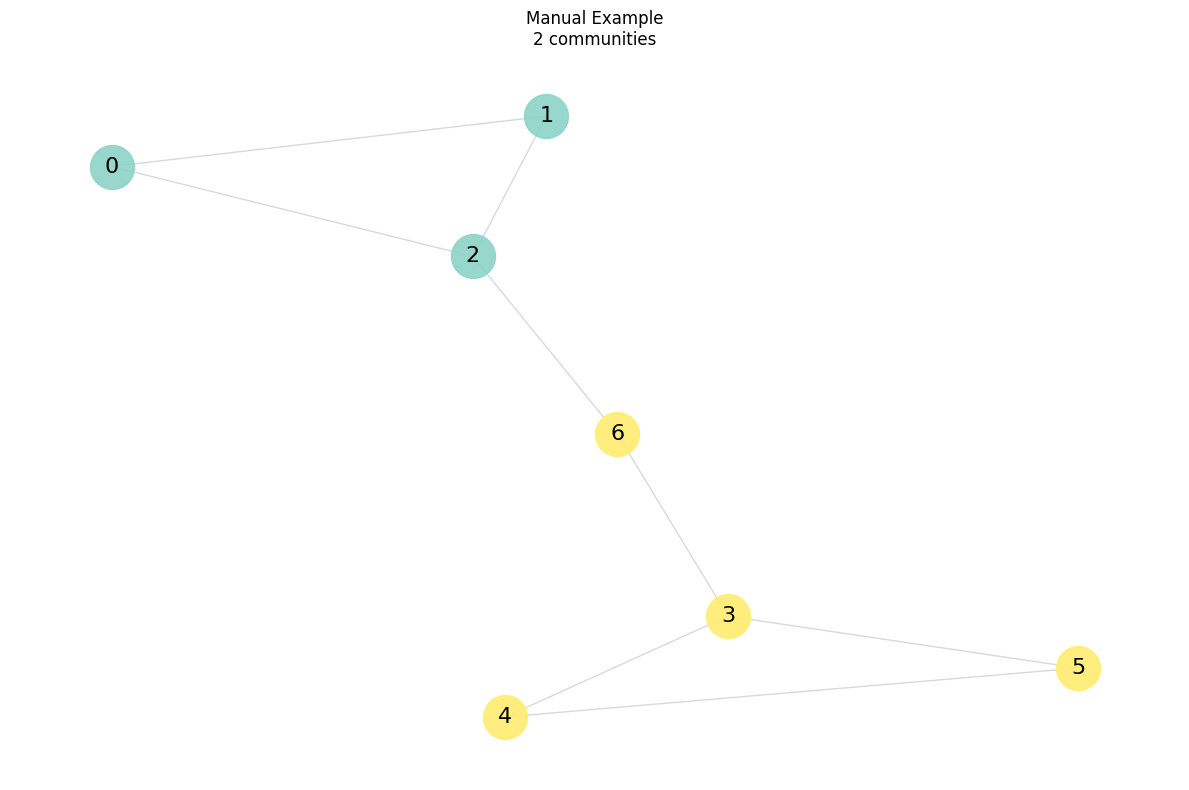

In [7]:
# Example of a simple graph wiht two communities
def create_manual_adjacency_example():
    """Create a small manual example for debugging"""
    
    # Simple graph with clear communities
    adj_list = {
        # Community A
        0: [1, 2],
        1: [0, 2],
        #2: [0, 1],
        
        # Community B  
        #3: [4, 5],
        4: [3, 5],
        5: [3, 4],
        
        # Bridge between communities
        2: [0, 1, 6],  # Add connection to bridge
        6: [2, 3],         # Bridge node
        3: [4, 5, 6]       # Add connection to bridge
    }
    
    print("Manual Example - Adjacency List:")
    for node, neighbors in sorted(adj_list.items()):
        print(f"  {node}: {neighbors}")
    
    # Detect communities
    communities = label_propagation_adjacency(adj_list)
    
    print(f"\nDetected {len(communities)} communities:")
    for i, (comm_id, nodes) in enumerate(communities.items()):
        print(f"  Community {i+1}: {sorted(nodes)}")
    
    # Visualize
    visualize_communities_adjacency(adj_list, communities, "Manual Example")
    
    return adj_list, communities

# Run the example
manual_adj_list, manual_communities = create_manual_adjacency_example()

ZACHARY'S KARATE CLUB - ADJACENCY LIST
Nodes: 34, Edges: 78
Known: 2 communities (after club split)
Converged after 10 iterations

Detected 2 communities:
  Community 1: 17 nodes
  Community 2: 17 nodes


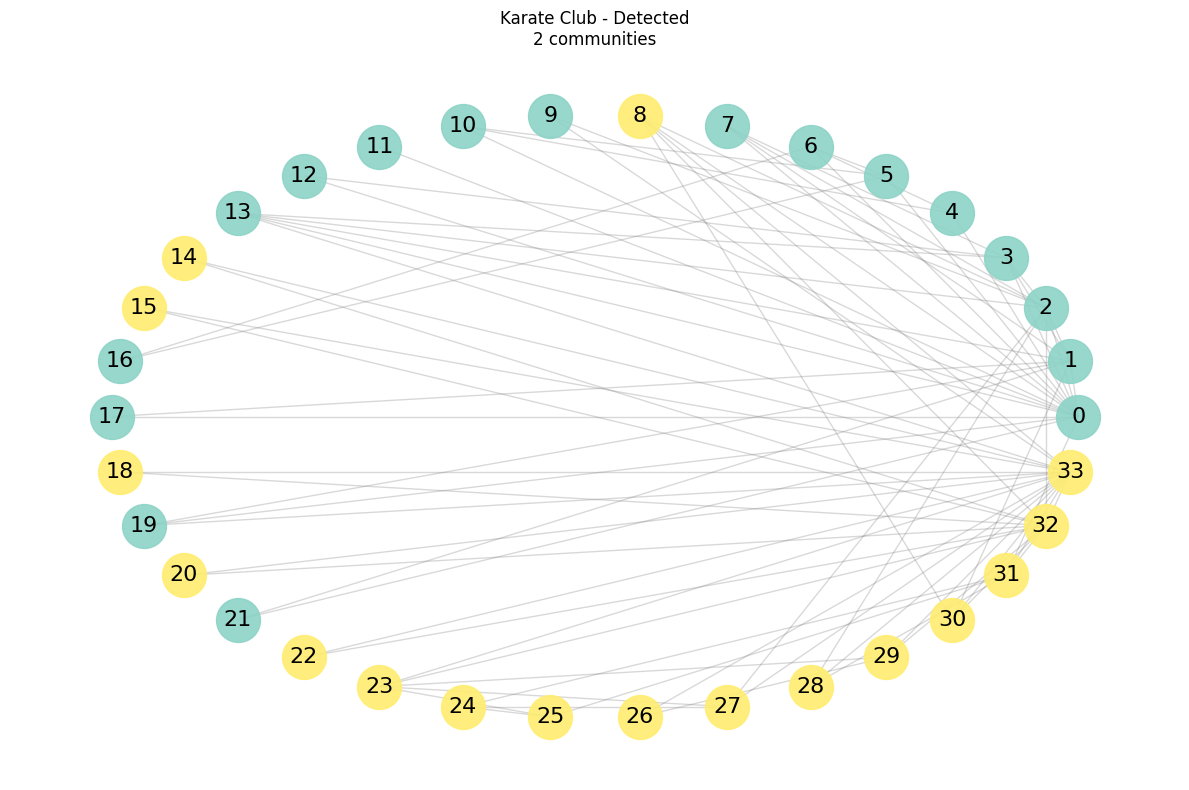

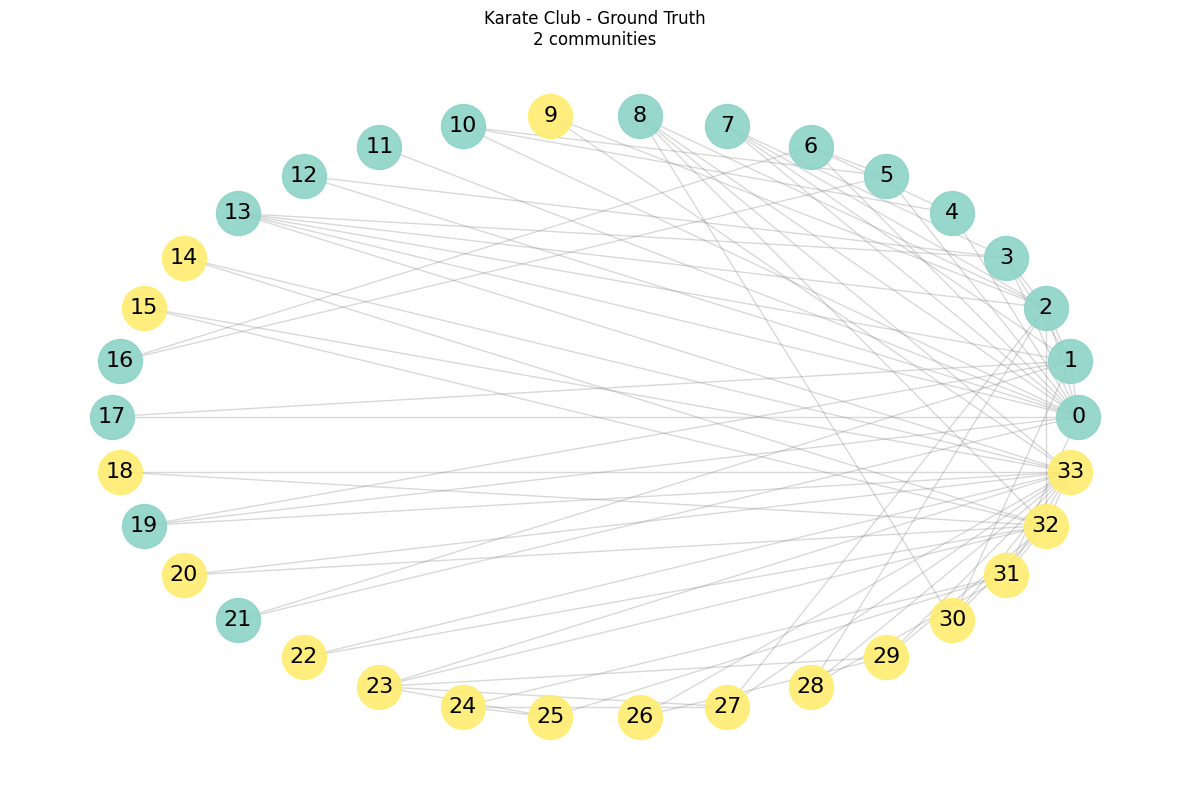

In [6]:
def karate_club_adjacency():
    """Work with Zachary's Karate Club as adjacency list"""
    
    # Load the famous dataset
    G = nx.karate_club_graph()
    
    # Convert to adjacency list
    adj_list = networkx_to_adjacency(G)
    
    print("ZACHARY'S KARATE CLUB - ADJACENCY LIST")
    print("=" * 50)
    print(f"Nodes: {len(adj_list)}, Edges: {sum(len(v) for v in adj_list.values()) // 2}")
    print("Known: 2 communities (after club split)")
    
    # Detect communities
    communities = label_propagation_adjacency(adj_list)
    
    print(f"\nDetected {len(communities)} communities:")
    for i, (comm_id, nodes) in enumerate(communities.items()):
        print(f"  Community {i+1}: {len(nodes)} nodes")
    
    
    # Compare with ground truth
    ground_truth = {
        0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21],
        1: [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
    }
    
    # Visualize both for comparison
    pos = nx.circular_layout(G)
    visualize_communities_adjacency(adj_list, communities, "Karate Club - Detected",pos)
    visualize_communities_adjacency(adj_list, ground_truth, "Karate Club - Ground Truth",pos)
    
    return adj_list, communities

# Run karate club example
karate_adj_list, karate_communities = karate_club_adjacency()